In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install tensorflow

     |█████████████████               | 318.3MB 130.9MB/s eta 0:00:03███▏                 | 266.5MB 130.9MB/s eta 0:00:03

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |███████████████████████████████▋| 593.2MB 120.3MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 601.3MB 21kB/s 
     |████████████████████████████████| 2.2MB 79.4MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 65.5MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 66.9MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 76.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 939kB/s  eta 0:00:01
     |████████████████████████████████| 24.5MB 80.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 1.6MB/s  eta 0:00:01
     |████████████████████████████████| 81kB 1.2MB/s  eta 0:00:01
     |████████████████████████████████| 296kB 96.7MB/s eta 0:00:01
     |████████████████████████████████| 143kB 76.3MB/s eta 0:00:01
     |████████████████████████████████| 5.1MB 78.3MB/s eta 0:00:01
     |████████████████████████████████| 5.4MB 87.2MB/s eta 0:00:01
     |████████████████████████████████| 245kB 94.8MB/s eta 0:00:01
     |████████████████████████████████| 368kB 78.4MB/s eta 0:00:01
     |██

In [2]:
print(tf.__version__)

2.11.0


In [3]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('/data/car_evaluation.csv',names=cols, header=None)

In [4]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

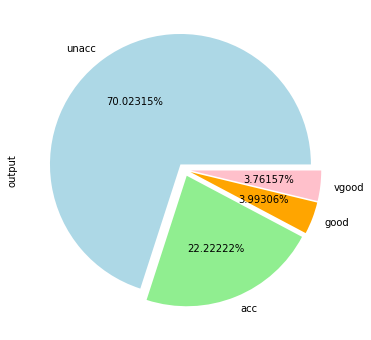

In [6]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))


In [7]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

In [8]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

In [9]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [10]:
y = labels.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [13]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model_tf = Model(inputs=input_layer, outputs=output)
model_tf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
print(model_tf.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model_tf.fit(X_train, y_train, batch_size=8, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
139/139 [==============================] - 1s 3ms/step - loss: 1.4025 - acc: 0.4262 - val_loss: 1.1591 - val_acc: 0.6498
Epoch 2/30
139/139 [==============================] - 0s 1ms/step - loss: 0.8983 - acc: 0.7195 - val_loss: 0.8576 - val_acc: 0.6498
Epoch 3/30
139/139 [==============================] - 0s 1ms/step - loss: 0.6611 - acc: 0.7195 - val_loss: 0.6987 - val_acc: 0.6498
Epoch 4/30
139/139 [==============================] - 0s 2ms/step - loss: 0.5258 - acc: 0.7321 - val_loss: 0.5891 - val_acc: 0.7220
Epoch 5/30
139/139 [==============================] - 0s 1ms/step - loss: 0.4176 - acc: 0.8416 - val_loss: 0.4840 - val_acc: 0.8267
Epoch 6/30
139/139 [==============================] - 0s 1ms/step - loss: 0.3490 - acc: 0.8805 - val_loss: 0.4359 - val_acc: 0.8123
Epoch 7/30
139/139 [==============================] - 0s 1ms/step - loss: 0.3079 - acc: 0.8833 - val_loss: 0.3982 - val_acc: 0.8448
Epoch 8/30
139/139 [==============================] - 0s 1ms/step - loss: 0.

In [16]:
score = model_tf.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.1031 - acc: 0.9653
Test Score: 0.10312570631504059
Test Accuracy: 0.9653179049491882


In [17]:
#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X,dtrain_Y)
    predictions = algorithm.predict(dtest_X)
    prediction_probabilities = algorithm.predict(dtest_X)
    print (algorithm)
    
    return predictions,prediction_probabilities,algorithm

In [18]:
y_pred,y_prob,model_obj=model(model_tf,X_train,y_train,X_test,y_test,X_train.columns)

11/11 [==============================] - 0s 874us/step


In [19]:
from mosaicml import *
from mosaicml.constants import MLModelFlavours

/tmp/pip_packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [20]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data = pd.DataFrame(eval(payload))
    prediction = pd.Series(model.predict(data))
    print (prediction)
    return prediction.tolist()

In [21]:
import requests
req = requests.Request()
req.json = {"payload":X_train.head(1).to_json(orient = 'records')}

In [22]:
req.json['payload']

'[{"price_high":0,"price_low":0,"price_med":0,"price_vhigh":1,"maint_high":0,"maint_low":0,"maint_med":0,"maint_vhigh":1,"doors_2":0,"doors_3":0,"doors_4":0,"doors_5more":1,"persons_2":0,"persons_4":0,"persons_more":1,"lug_capacity_big":1,"lug_capacity_med":0,"lug_capacity_small":0,"safety_high":1,"safety_low":0,"safety_med":0}]'

In [23]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [24]:
sch = generate_schema(score,(model_obj, req),X_train)
print(sch)

1/1 [==============================] - 0s 39ms/step
Error while generating schema:
Data must be 1-dimensional
None


In [25]:
register_model(model_obj, score, name="CarEvaluation_ClassificationTENSORFLOW", 
                description="Classify Car basis the feature",
                flavour=MLModelFlavours.tensorflow, schema=sch,
                y_true=y_test, y_pred = y_pred, #y_pred=pd.Series(y_pred), 
                prob=y_pred, features=X_train.columns, 
               labels=["condition_acc","condition_good","condition_unacc","condition_vgood"], 
               init_script="" ,
                model_type="classification", 
                input_type="json", explain_ai=False, x_train=X_train, x_test=X_test, 
                y_train=y_train, y_test=y_test,
                feature_names=list(X_train.columns),feature_ids=list(X_train.columns),
                target_names=["condition_acc","condition_good","condition_unacc","condition_vgood"], 
                kyd=True, kyd_score =True)
print("Registering model")

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


Registering model
